In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ssl
from tensorflow.keras.datasets import cifar10

# **Question 1**

In [3]:
#import dataset
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


### **1.**

In [4]:
#get shapes
print("X_Train shape:", x_train.shape)
print("Y_Train shape:", y_train.shape)
print("X_Test shape:", x_test.shape)
print("Y_Test shape:", y_test.shape)

X_Train shape: (50000, 32, 32, 3)
Y_Train shape: (50000, 1)
X_Test shape: (10000, 32, 32, 3)
Y_Test shape: (10000, 1)


We need to reshape y_test and y_train to be one dimensional ex: (1000, )

In [5]:
#reshape
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

#make sure change was made
print("Y_Train shape:", y_train.shape)
print("Y_Test shape:", y_test.shape)

Y_Train shape: (50000,)
Y_Test shape: (10000,)


### **2.**

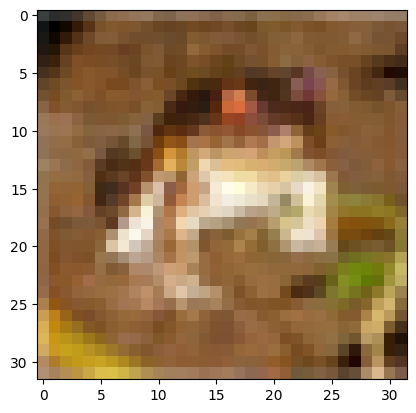

In [6]:
#plot first image from train set
plt.imshow(x_train[0])
plt.show()

In [7]:
#label for image
print("Label:", y_train[0])

Label: 6


The label for the image is "6"

### **3.**

In [8]:
#normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

### **4.**

I decided to leave as integers. In this case we would use sparse categorical cross-entropy as the loss function.

# **Question 2**

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping

In [10]:
print(f'Train set shape is: {x_train.shape}')
print(f'Test set shape is: {x_test.shape}')

Train set shape is: (50000, 32, 32, 3)
Test set shape is: (10000, 32, 32, 3)


In [11]:
#flatten images
x_train_ann = x_train.reshape(50000, 32*32*3)
x_train_ann = x_train_ann / 255.0

x_test_ann = x_test.reshape(10000, 32*32*3)
x_test_ann = x_test_ann / 255.0

In [12]:
x_train_ann.shape

(50000, 3072)

In [13]:
#add model checkpoint
modelcheckpoint  = ModelCheckpoint("best_ann_model.keras",save_best_only=True, monitor="val_loss")
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [14]:
#build model
ann_model = keras.Sequential(name="ann_mnist")
ann_model.add(layers.Input(shape=(3072,)))
ann_model.add(layers.Dense(units = 512, activation = 'relu', name="first_layer"))

ann_model.add(layers.Dense(units = 10, activation = 'softmax', name="output_layer"))

In [15]:
ann_model.summary()

Model: "ann_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_layer (Dense)                  │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
#train the model
history_ann = ann_model.fit(x = x_train_ann, y = y_train,
          validation_data=(x_test_ann, y_test),
          epochs=10, batch_size=128, callbacks=[modelcheckpoint, early_stopping])

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.2131 - loss: 2.1601 - val_accuracy: 0.3145 - val_loss: 1.9212
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.3268 - loss: 1.8942 - val_accuracy: 0.3468 - val_loss: 1.8469
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.3563 - loss: 1.8301 - val_accuracy: 0.3736 - val_loss: 1.7842
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.3696 - loss: 1.7779 - val_accuracy: 0.3800 - val_loss: 1.7424
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.3836 - loss: 1.7392 - val_accuracy: 0.3988 - val_loss: 1.7045
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4037 - loss: 1.6946 - val_accuracy: 0.3991 - val_loss: 1.6884
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.4101 - loss: 1.6674 - val_accuracy: 0.4193 - val_loss: 1.6463
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.4263 - loss: 1.6409 - 

In [18]:
#report accuracy
best_ann_model = keras.models.load_model("best_ann_model.keras")
best_ann_loss, best_ann_acc = best_ann_model.evaluate(x_test_ann, y_test)

print("Accuracy of the best model:", round(best_ann_acc,2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4315 - loss: 1.5892
Accuracy of the best model: 0.43


# **Question 3**

In [19]:
#create model
def CNN_model_builder():
  inputs = keras.Input(shape=(32, 32, 3), name = 'Input_layer')
  X = layers.Conv2D(filters = 32, kernel_size = 3, strides = (1,1), padding = 'valid', activation = 'relu', name = 'conv_layer_1')(inputs)
  X = layers.MaxPool2D(pool_size = 2, name = "polling_1")(X)
  X = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', name = "conv_layer_2")(X)
  X = layers.MaxPool2D(pool_size = 2, name = "pooling_2")(X)
  X = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(X)
  X = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu', name = "conv_layer_4")(X)

  X = layers.Flatten(name = "flattening_layer")(X)
  X = layers.Dense(units = 128, activation = 'relu')(X)

  outputs = layers.Dense(units = 10, activation = "softmax", name = "output_layer")(X)

  model = keras.Model(inputs = inputs, outputs = outputs, name = "hw5_CNN_model")
  model.compile(optimizer = 'rmsprop',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [20]:
model = CNN_model_builder()
model.summary()

Model: "hw5_CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_1 (Conv2D)                │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ polling_1 (MaxPooling2D)             │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_4 (Conv2D)                │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flattening_layer (Flatten)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,906 (1.99 MB)

 Trainable params: 520,906 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#add model checkpoint and early stopping
modelcheckpoint  = ModelCheckpoint("best_cnn_model.keras",save_best_only=True, monitor="val_loss")
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [22]:
#train the model
history_cnn = model.fit(x = x_train, y = y_train,
          validation_data=(x_test, y_test),
          epochs=10, batch_size=128, callbacks=[modelcheckpoint, early_stopping])

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 107s 270ms/step - accuracy: 0.2479 - loss: 2.0245 - val_accuracy: 0.4366 - val_loss: 1.5505
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 137s 256ms/step - accuracy: 0.4881 - loss: 1.4303 - val_accuracy: 0.5182 - val_loss: 1.2888
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 101s 258ms/step - accuracy: 0.5912 - loss: 1.1631 - val_accuracy: 0.6297 - val_loss: 1.0547
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 258ms/step - accuracy: 0.6531 - loss: 0.9925 - val_accuracy: 0.6390 - val_loss: 1.0535
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 100s 255ms/step - accuracy: 0.6927 - loss: 0.8709 - val_accuracy: 0.6789 - val_loss: 0.9338
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 264ms/step - accuracy: 0.7336 - loss: 0.7575 - val_accuracy: 0.6831 - val_loss: 0.9252
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 138s 254ms/step - accuracy: 0.7746 - loss: 0.6466 - val_accuracy: 0.7241 - val_loss: 0.8171
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 253ms/step - accuracy: 0.8064 -

In [23]:
#report accuracy
best_cnn_model = keras.models.load_model("best_cnn_model.keras")
best_cnn_loss, best_cnn_acc = best_cnn_model.evaluate(x_test, y_test)

print("Accuracy of the best model:", round(best_cnn_acc,2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7262 - loss: 0.8126
Accuracy of the best model: 0.72


# **Question 4**

In [24]:
#augment data
data_augmentation = keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1)])

In [25]:
#build model
def CNN_builder_augmented():
  inputs = keras.Input(shape=(32, 32, 3), name = 'Input_layer')
  X = data_augmentation(inputs)
  X = layers.Rescaling(1./255)(X)
  X = layers.Reshape((32, 32, 3))(X)

  X = layers.Conv2D(filters = 32, kernel_size = 3, strides = (1,1), padding = 'valid', activation = 'relu', name = 'conv_layer_1')(inputs)
  X = layers.MaxPool2D(pool_size = 2, name = "polling_1")(X)
  X = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', name = "conv_layer_2")(X)
  X = layers.MaxPool2D(pool_size = 2, name = "pooling_2")(X)
  X = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(X)
  X = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu', name = "conv_layer_4")(X)

  X = layers.Flatten(name = "flattening_layer")(X)
  X = layers.Dropout(0.5)(X)

  outputs = layers.Dense(units = 10, activation = "softmax", name = "output_layer")(X)

  model = keras.Model(inputs = inputs, outputs = outputs, name = "hw5_CNN_aug_model")
  model.compile(optimizer = 'rmsprop',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [26]:
model_augmented = CNN_builder_augmented()
model_augmented.summary()

Model: "hw5_CNN_aug_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_1 (Conv2D)                │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ polling_1 (MaxPooling2D)             │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_4 (Conv2D)                │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flattening_layer (Flatten)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 398,666 (1.52 MB)

 Trainable params: 398,666 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#add model checkpoint and early stopping
modelcheckpoint  = ModelCheckpoint("best_cnn_aug_model.keras",save_best_only=True, monitor="val_loss")
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [28]:
#train model
history_cnn_aug = model_augmented.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),
          epochs=10, batch_size=128, callbacks=[modelcheckpoint, early_stopping])

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 104s 262ms/step - accuracy: 0.2446 - loss: 2.0263 - val_accuracy: 0.4414 - val_loss: 1.5771
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 258ms/step - accuracy: 0.4802 - loss: 1.4544 - val_accuracy: 0.5509 - val_loss: 1.2996
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 259ms/step - accuracy: 0.5624 - loss: 1.2453 - val_accuracy: 0.6011 - val_loss: 1.1227
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 100s 256ms/step - accuracy: 0.6234 - loss: 1.0841 - val_accuracy: 0.6249 - val_loss: 1.1122
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 262ms/step - accuracy: 0.6604 - loss: 0.9749 - val_accuracy: 0.5983 - val_loss: 1.1275
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 259ms/step - accuracy: 0.6886 - loss: 0.8826 - val_accuracy: 0.6700 - val_loss: 0.9427
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 256ms/step - accuracy: 0.7205 - loss: 0.7993 - val_accuracy: 0.6839 - val_loss: 0.9048
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 262ms/step - accuracy: 0.7459 -

In [29]:
#report accuracy
best_cnn_aug_model = keras.models.load_model("best_cnn_aug_model.keras")
best_cnn_aug_loss, best_cnn_aug_acc = best_cnn_aug_model.evaluate(x_test, y_test)

print("Accuracy of the best model:", round(best_cnn_aug_acc,2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7368 - loss: 0.7905
Accuracy of the best model: 0.74


# **Question 5**

In [31]:
#save best perfoming model
winning_model = keras.models.load_model('best_cnn_aug_model.keras')

### **1.**

In [32]:
#winning model summary
winning_model.summary()

Model: "hw5_CNN_aug_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_1 (Conv2D)                │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ polling_1 (MaxPooling2D)             │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_4 (Conv2D)                │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flattening_layer (Flatten)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 797,334 (3.04 MB)

 Trainable params: 398,666 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 398,668 (1.52 MB)

In my last convolution layer, there are 295,168 parameters.

(3 x 3 x 128 + 1) x 256

### **2.**

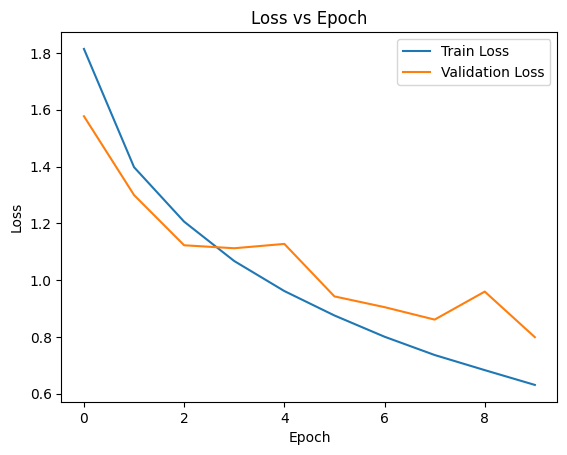

In [36]:
#plot loss vs epoch
plt.plot(history_cnn_aug.history['loss'], label = 'Train Loss')
plt.plot(history_cnn_aug.history['val_loss'], label = 'Validation Loss')
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

The model starts to overfit around epoch 2. Here is when the validation loss starts to plateau and the gap between train loss and validation loss starts.

### **3.**

In [37]:
#get predictions
pred_prob = winning_model.predict(x_test)
y_pred = np.argmax(pred_prob, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
#print confusion matrix and classification report
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1000
           1       0.84      0.85      0.85      1000
           2       0.72      0.56      0.63      1000
           3       0.70      0.42      0.53      1000
           4       0.67      0.75      0.71      1000
           5       0.59      0.73      0.65      1000
           6       0.69      0.88      0.77      1000
           7       0.83      0.74      0.78      1000
           8       0.90      0.76      0.82      1000
           9       0.72      0.89      0.79      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.73     10000

[[775  29  32   7  28   7  15   6  43  58]
 [  6 855   6   4   8   6  15   0  12  88]
 [ 77  10 562  38  80  85  96  27   6  19]
 [ 10  12  56 422  79 241 105  23  10  42]
 [ 12   2  48  16 746  44  69  51   4   8]
 [ 11   1  28  72  47 734 

Based on the f1 score, class 3 has the lowest score or 0.53. This means that our model struggling to identify class 3's more than all of the other classes.

### **4.**

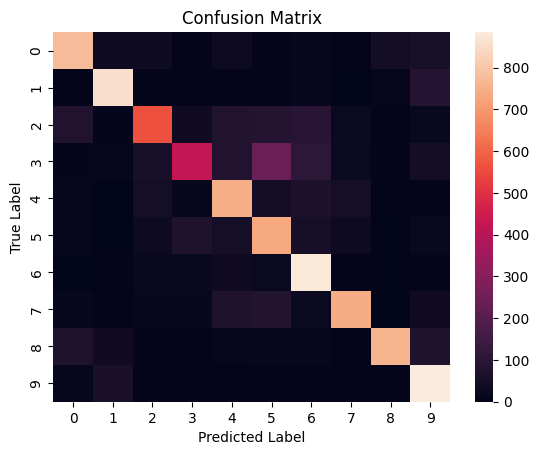

In [39]:
import seaborn as sns
#heatmap of confusion matrix
sns.heatmap(conf_matrix)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Classes 2 and 3: Class 2 is getting misclassified as a Class 3 on 77 instances.

Classes 3 and 5: Class  is getting misclassified as a Class 5 on 241 instances.

Classes 5 and 6: Class 5 is getting misclassified as a Class 6 on 55 instances. There are also a sizable amount of misclassifications of Class 6 as 5.

### **5.**

In [40]:
#get misclassified images
misclassified_images = [i for i, x in enumerate(y_test!=y_pred) if x==True]
misclassified_images[:9]

[2, 10, 15, 22, 24, 25, 28, 35, 36]

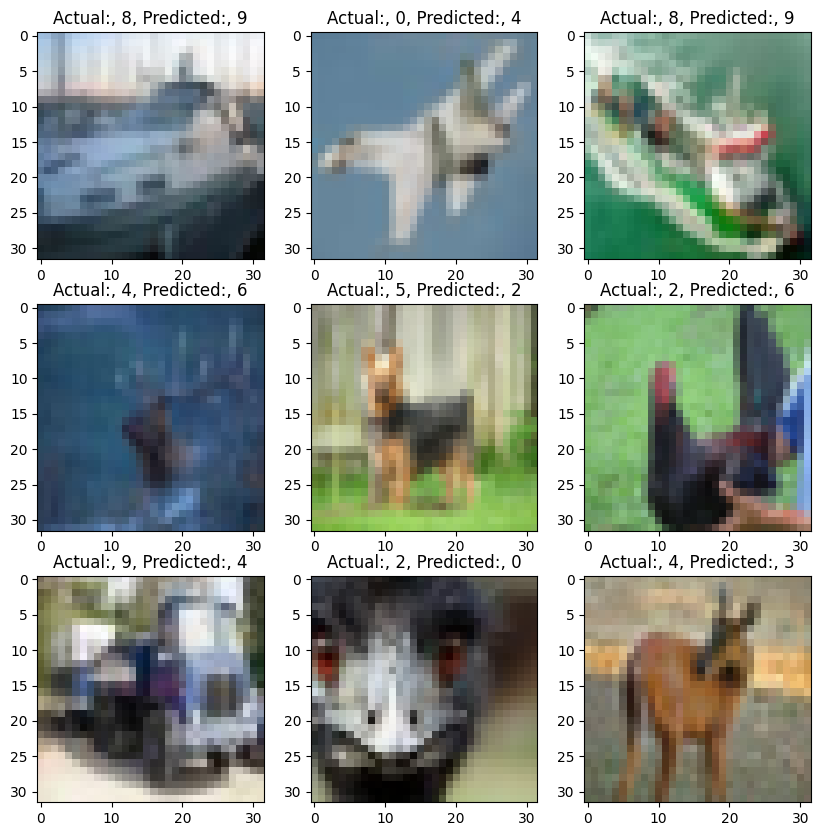

In [47]:
#plot missclassifications
plt.figure(figsize=(10,10))
actuals = []
for i , number in enumerate(misclassified_images[:9]):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_test[number])
  plt.title(f"Actual:, {y_test[number]}, Predicted:, {y_train[number]}")
  actuals.append(y_test[number])
plt.show()

### **6.**

I was able to identify all of them except for the last one. For a second I thought that it might be a dog. So my accuracy would be 83%